<a href="https://colab.research.google.com/github/BoogeunSong/song/blob/main/%EA%B3%BC%EC%A0%9C2(%EC%98%81%ED%99%94_%EB%A7%A4%EC%B6%9C%EC%95%A1_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#영화 매출액 예측 모델

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:

df = pd.read_csv("/content/drive/MyDrive/영화에 진심.CSV", encoding = "cp949")
df

,영화제목,천만여부,연도,누적관객수,매출액,스크린수,제작비,넷플릭스,배급사,네이버평점,...,연령가,시리즈여부,상영횟수,감독,러닝타임,수상여부,원작여부,주연배우수,주연배우,대표배우필모그래피
0,명량,1,2014,17615437,1357,1587,190,0,CJ ENM,8,...,1,1,188668,김한민,128,1,1,3,최민식,32
1,극한직업,1,2019,16265618,1396,1978,95,0,CJ ENM,9,...,1,0,292584,이병헌,111,1,0,5,류승룡,36
2,신과함께 - 죄와 벌,1,2017,14411502,1156,1912,200,0,㈜롯데ENT,8,...,0,1,213262,김용화,139,1,1,5,하정우,44
3,국제시장,1,2014,14263203,1109,966,180,0,CJ ENM,9,...,0,0,212683,윤제균,126,1,0,4,황정민,45
4,아바타,1,2009,14003138,1284,912,2931,1,20세기폭스,9,...,0,1,177773,제임스 카메론,162,1,0,7,아바타,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,분노의 질주:홉스앤쇼,0,2019,3657536,322,1311,2466,0,유니버셜픽쳐스,8,...,0,1,94896,데이비드 리치,136,1,0,4,드웨인 존슨,33
96,남자가 사랑할때,0,2014,1979311,145,531,31,1,㈜NEW,8,...,1,0,41123,한동욱,120,0,0,2,황정민,45
97,데드풀,0,2016,3317196,276,1036,715,0,월트디즈니컴퍼니코리아,8,...,1,1,82521,팀 밀러,106,1,1,1,라이언 레이놀즈,38
98,나우유씨미2,0,2016,3100113,251,1200,1109,1,㈜롯데ENT,8,...,0,1,56981,존M.추,129,0,0,5,제시 아이젠버그,24


In [ ]:
df.describe()

,천만여부,연도,누적관객수,매출액,스크린수,제작비,넷플릭스,네이버평점,국-내외,개봉월,연령가,시리즈여부,상영횟수,러닝타임,수상여부,원작여부,주연배우수,대표배우필모그래피
count,100.000000,100.00000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.280000,2016.66000,6.448725e+06,504.490000,1276.050000,541.430000,0.610000,7.99000,0.240000,6.530000,0.610000,0.310000,126418.170000,126.040000,0.720000,0.420000,4.390000,35.170000
std,0.451261,3.80648,4.548541e+06,367.626306,585.989268,925.520124,0.490207,0.87033,0.429235,3.391776,0.490207,0.464823,71473.416583,15.169027,0.451261,0.496045,3.100652,14.957215
min,0.000000,2003.00000,4.073230e+05,32.000000,83.000000,5.000000,0.000000,6.00000,0.000000,1.000000,0.000000,0.000000,14276.000000,95.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,2015.00000,2.406176e+06,191.250000,920.250000,70.000000,0.000000,8.00000,0.000000,4.000000,0.000000,0.000000,68485.500000,115.000000,0.000000,0.000000,3.000000,21.750000
50%,0.000000,2017.00000,5.357660e+06,423.000000,1205.000000,116.500000,1.000000,8.00000,0.000000,7.000000,1.000000,0.000000,118857.000000,126.000000,1.000000,0.000000,4.000000,40.000000
75%,1.000000,2019.00000,1.035607e+07,819.750000,1607.250000,242.500000,1.000000,9.00000,0.000000,9.000000,1.000000,1.000000,172018.500000,135.000000,1.000000,1.000000,5.000000,45.000000
max,1.000000,2022.00000,1.761544e+07,1396.000000,2948.000000,4228.000000,1.000000,9.00000,1.000000,12.000000,1.000000,1.000000,355767.000000,181.000000,1.000000,1.000000,22.000000,79.000000


In [ ]:
df.corr()

,천만여부,연도,누적관객수,매출액,스크린수,제작비,넷플릭스,네이버평점,국-내외,개봉월,연령가,시리즈여부,상영횟수,러닝타임,수상여부,원작여부,주연배우수,대표배우필모그래피
천만여부,1.000000,-0.449740,0.851810,0.752408,0.111716,0.224487,-0.368951,0.392985,0.014602,0.053852,-0.094978,0.063566,0.523654,0.249205,0.289683,-0.034295,0.231589,0.136544
연도,-0.449740,1.000000,-0.397935,-0.111713,0.631503,0.098593,0.209711,-0.177879,0.112270,-0.065704,-0.109673,0.174350,0.204801,-0.181522,-0.244158,0.071043,0.018195,-0.097085
누적관객수,0.851810,-0.397935,1.000000,0.908288,0.266041,0.220281,-0.385184,0.540455,0.038622,0.073421,-0.108064,0.155685,0.723470,0.316455,0.394539,0.015626,0.212842,0.154302
매출액,0.752408,-0.111713,0.908288,1.000000,0.473582,0.296765,-0.323629,0.513154,0.111909,0.095914,-0.143090,0.228986,0.849486,0.279608,0.330482,0.003956,0.260251,0.113987
스크린수,0.111716,0.631503,0.266041,0.473582,1.000000,0.392355,0.042054,0.077877,0.167293,0.005968,-0.160278,0.400080,0.642231,0.238095,0.011016,0.218157,0.288479,0.028878
제작비,0.224487,0.098593,0.220281,0.296765,0.392355,1.000000,-0.053995,0.290305,0.797820,-0.035703,-0.497445,0.471346,0.324163,0.429081,0.061117,0.295681,0.316704,-0.197110
넷플릭스,-0.368951,0.209711,-0.385184,-0.323629,0.042054,-0.053995,1.000000,-0.222314,-0.126734,-0.232861,0.033207,-0.129000,-0.178277,-0.209791,-0.224658,-0.025755,-0.118225,0.039442
네이버평점,0.392985,-0.177879,0.540455,0.513154,0.077877,0.290305,-0.222314,1.000000,0.303915,0.001814,-0.198638,0.082646,0.479516,0.127039,0.327145,0.080018,0.102523,0.087814
국-내외,0.014602,0.112270,0.038622,0.111909,0.167293,0.797820,-0.126734,0.303915,1.000000,-0.032748,-0.510778,0.382740,0.152087,0.248279,0.037547,0.280848,0.073163,-0.226685
개봉월,0.053852,-0.065704,0.073421,0.095914,0.005968,-0.035703,-0.232861,0.001814,-0.032748,1.000000,-0.093132,0.003652,-0.003448,0.215151,0.137533,0.004443,0.056985,0.096764


In [ ]:
dt_t = df.corr()

In [ ]:
dt_t = pd.DataFrame(dt_t)
dt_t

,천만여부,연도,누적관객수,매출액,스크린수,제작비,넷플릭스,네이버평점,국-내외,개봉월,연령가,시리즈여부,상영횟수,러닝타임,수상여부,원작여부,주연배우수,대표배우필모그래피
천만여부,1.000000,-0.449740,0.851810,0.752408,0.111716,0.224487,-0.368951,0.392985,0.014602,0.053852,-0.094978,0.063566,0.523654,0.249205,0.289683,-0.034295,0.231589,0.136544
연도,-0.449740,1.000000,-0.397935,-0.111713,0.631503,0.098593,0.209711,-0.177879,0.112270,-0.065704,-0.109673,0.174350,0.204801,-0.181522,-0.244158,0.071043,0.018195,-0.097085
누적관객수,0.851810,-0.397935,1.000000,0.908288,0.266041,0.220281,-0.385184,0.540455,0.038622,0.073421,-0.108064,0.155685,0.723470,0.316455,0.394539,0.015626,0.212842,0.154302
매출액,0.752408,-0.111713,0.908288,1.000000,0.473582,0.296765,-0.323629,0.513154,0.111909,0.095914,-0.143090,0.228986,0.849486,0.279608,0.330482,0.003956,0.260251,0.113987
스크린수,0.111716,0.631503,0.266041,0.473582,1.000000,0.392355,0.042054,0.077877,0.167293,0.005968,-0.160278,0.400080,0.642231,0.238095,0.011016,0.218157,0.288479,0.028878
제작비,0.224487,0.098593,0.220281,0.296765,0.392355,1.000000,-0.053995,0.290305,0.797820,-0.035703,-0.497445,0.471346,0.324163,0.429081,0.061117,0.295681,0.316704,-0.197110
넷플릭스,-0.368951,0.209711,-0.385184,-0.323629,0.042054,-0.053995,1.000000,-0.222314,-0.126734,-0.232861,0.033207,-0.129000,-0.178277,-0.209791,-0.224658,-0.025755,-0.118225,0.039442
네이버평점,0.392985,-0.177879,0.540455,0.513154,0.077877,0.290305,-0.222314,1.000000,0.303915,0.001814,-0.198638,0.082646,0.479516,0.127039,0.327145,0.080018,0.102523,0.087814
국-내외,0.014602,0.112270,0.038622,0.111909,0.167293,0.797820,-0.126734,0.303915,1.000000,-0.032748,-0.510778,0.382740,0.152087,0.248279,0.037547,0.280848,0.073163,-0.226685
개봉월,0.053852,-0.065704,0.073421,0.095914,0.005968,-0.035703,-0.232861,0.001814,-0.032748,1.000000,-0.093132,0.003652,-0.003448,0.215151,0.137533,0.004443,0.056985,0.096764


In [ ]:
df.columns

Index(['영화제목', '천만여부', '연도', '누적관객수', '매출액', '스크린수', '제작비', '넷플릭스', '배급사',
       '네이버평점', '국-내외', '영화분류', '개봉월', '연령가', '시리즈여부', '상영횟수', '감독', '러닝타임',
       '수상여부', '원작여부', '주연배우수', '주연배우', '대표배우필모그래피'],
      dtype='object')

In [ ]:
#필요열(변수,feature)만 뽑아서 데이터 만들기
X=df[["누적관객수","매출액","상영횟수","천만여부"]]
Y=df["대표배우필모그래피"]

#데이터분할 (train,test)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#model 만들기
model=KNeighborsRegressor()

#교차검증
score = cross_val_score(model, X_train, Y_train, cv=10)
print("교차검증점수:", score)

교차검증점수: [ 0.13953792 -5.57744487 -0.07229917 -0.3596618  -0.7027021   0.00877756
  0.26980457 -0.15236852  0.07955899 -0.90229343]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

X=df[["매출액","상영횟수","네이버평점","시리즈여부","러닝타임"]]
Y=df["연령가"]

#데이터분할 (train,test)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#model 만들기
model=KNeighborsClassifier()

#검증
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
scores=cross_val_score(model,X_train,Y_train,cv=skf)
print("교차검증점수:", scores)

교차검증점수: [0.5        0.71428571 0.71428571 0.71428571 0.57142857]


#Grid Search

In [ ]:
#격자:grid
from sklearn.model_selection import GridSearchCV

#필요열(변수,feature)만 뽑아서 데이터 만들기
X=df[["매출액","상영횟수","네이버평점","시리즈여부","러닝타임"]]
Y=df["연령가"]

#데이터분할 (train,test)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#model 만들기
model=KNeighborsClassifier()

#Grid 인자 검색
mylist=list(range(1,50))
k_list=[x for x in mylist if x%2 !=0]
parameter_grid={"n_neighbors":k_list}

In [ ]:
grid_search=GridSearchCV(model,parameter_grid,cv=10)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49]})

In [ ]:
grid_search.best_params_

{'n_neighbors': 17}

In [ ]:
from sklearn.metrics import accuracy_score
be=grid_search.best_estimator_
pred=be.predict(X_test)
accuracy_score(Y_test,pred)

0.4

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X_train_under, Y_train_under = RandomUnderSampler(random_state=0).fit_resample(X_train,Y_train)

print("original data %s" %Counter(Y)) 
print("original train data %s" %Counter(Y_train)) 
print("under train data %s" %Counter(Y_train_under))

original data Counter({1: 61, 0: 39})
original train data Counter({1: 49, 0: 21})
under train data Counter({0: 21, 1: 21})


In [ ]:
import seaborn as sns
import numpy as np

#선형회귀

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0, flags=flags)


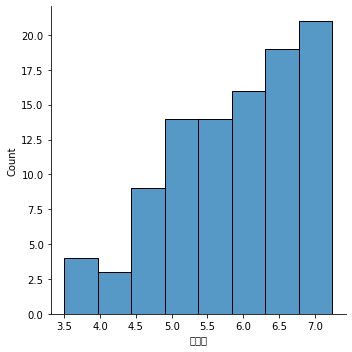

In [ ]:
df["매출액"]=np.log1p(df["매출액"])
sns.displot(df["매출액"])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 

num = ['누적관객수', '스크린수', '제작비', '상영횟수', '러닝타임', '대표배우필모그래피', '주연배우수']
cg = ['천만여부', '넷플릭스','네이버평점', '국-내외', '개봉월', '수상여부', '원작여부', '시리즈여부']

In [ ]:
X = df[num+cg]
Y = df["매출액"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

ct = ColumnTransformer([('scling', StandardScaler(), num), ('onehot', OneHotEncoder(sparse=False), cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train[0])

[-0.21972519  0.35314602 -0.37411422  0.31659661 -0.16465017  1.06744449
  0.23065784  1.          0.          1.          0.          0.
  0.          1.          0.          1.          0.          0.
  0.          0.          0.          1.          0.          0.
  0.          0.          0.          0.          0.          0.
  1.          0.          1.          1.          0.        ]


In [ ]:
X_test

array([[ 0.94151664,  0.32457874,  2.07070736, ...,  0.        ,
         1.        ,  0.        ],
       [-1.06146509,  0.80450908, -0.37538228, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.84957344,  1.41013546, -0.26379292, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.0422009 ,  0.07318666, -0.34748494, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.4695698 ,  1.53011805,  2.16581193, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.33111409,  3.38318242,  2.31544313, ...,  1.        ,
         0.        ,  1.        ]])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

lr=LinearRegression().fit(X_train,Y_train)

Y_pred = lr.predict(X_test)
print("predict value\n",Y_pred)
print("train R2:{:.3f}",format(lr.score(X_train,Y_train)))
print("test R2:{:.3f}",format(lr.score(X_test,Y_test)))

rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:{:.3f}",format(rmse))

predict value
 [6.02677964 5.39961292 6.9165087  6.89435101 5.01161062 6.48498809
 6.66893435 5.34005968 6.24658722 5.78511136 5.33409798 5.18492044
 5.36413641 7.56974377 7.01979578 5.6166196  6.75944606 6.1232524
 5.36311668 6.26300861 5.635887   4.7755278  7.09540961 4.40841053
 6.0134534  5.85205493 7.35247363 6.23916991 7.22433354 6.95388542]
train R2:{:.3f} 0.8561036919403083
test R2:{:.3f} 0.7002116242686509
RMSE:{:.3f} 0.4861492975666668


In [ ]:
print("절편",np.round(lr.intercept_,3))
print("가중치(beta)",np.round(lr.coef_,3))

절편 5.468
가중치(beta) [ 0.626  0.152  0.095  0.172 -0.069  0.009  0.023  0.293 -0.293  0.077
 -0.077 -0.073 -0.102 -0.074  0.249  0.048 -0.048  0.11  -0.469 -0.235
 -0.218  0.13   0.293  0.21   0.14   0.422 -0.123 -0.351  0.092 -0.114
  0.114  0.01  -0.01   0.04  -0.04 ]


#릿지

In [ ]:
from sklearn.linear_model import Ridge

lr_ridge = Ridge(random_state=0).fit(X_train, Y_train)
Y_pred = lr_ridge.predict(X_test)

print("예측값(Y predict value) \n", Y_pred)
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("R2 : {:.3f}".format(lr_ridge.score(X_train,Y_train)))
print("RMSE : {:.3f}".format(rmse))

예측값(Y predict value) 
 [6.18238261 5.32128719 7.04893296 6.70835345 4.84328275 6.33466066
 6.81959887 5.17808102 6.08607953 5.73180998 5.33700414 5.25927493
 5.41287688 7.74332721 7.0287961  5.69753905 6.79558891 6.29391877
 5.38081855 6.25702193 5.48573869 4.76833657 7.09475695 4.63780162
 5.94265093 5.89358065 7.44537199 6.13919486 6.99718802 6.76011942]
R2 : 0.852
RMSE : 0.427


In [ ]:
Y_test = Y_test.reset_index()

In [ ]:
Y_test

,index,매출액
0,26,6.712956
1,86,4.844187
2,2,7.053586
3,55,6.383507
4,75,3.891820
5,93,6.440947
6,16,6.934397
7,73,4.905275
8,54,6.226537
9,95,5.777652


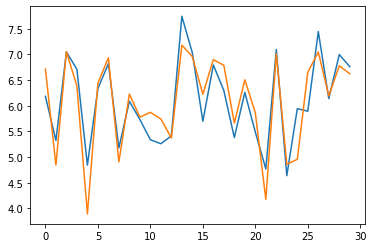

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(Y_pred)
plt.plot(Y_test["매출액"])

In [ ]:
print("lr R2 : {:.3f}".format(lr.score(X_train, Y_train)))

lr R2 : 0.856


#라쏘

In [ ]:
from sklearn.linear_model import Lasso

lr_lasso = Lasso(random_state=0,alpha=0.01,max_iter=1000).fit(X_train, Y_train)
Y_pred = lr_lasso.predict(X_test)

print("예측값(Y predict value) \n", Y_pred)

예측값(Y predict value) 
 [6.34990794 5.21293773 7.23782646 6.39666782 4.83009358 6.12474686
 6.9517329  5.01864893 5.96858462 5.49999521 5.32372138 5.39949855
 5.41309685 7.88586299 6.96569862 5.6939793  6.99861118 6.62477869
 5.3039294  6.25528343 5.4750098  4.75893885 7.08171719 4.87238331
 5.882562   6.08534851 7.63131279 6.1148364  6.72159181 6.49183879]


In [ ]:
X = df[num+cg]
Y = df["매출액"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

ct = ColumnTransformer([('scling', StandardScaler(), num), ('onehot', OneHotEncoder(sparse=False), cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train[0])

[-0.21972519  0.35314602 -0.37411422  0.31659661 -0.16465017  1.06744449
  0.23065784  1.          0.          1.          0.          0.
  0.          1.          0.          1.          0.          0.
  0.          0.          0.          1.          0.          0.
  0.          0.          0.          0.          0.          0.
  1.          0.          1.          1.          0.        ]


In [ ]:
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("Lasso R2 : {:.3f}".format(lr_lasso.score(X_train, Y_train)))
print("RMSE : {:.3f}".format(rmse))

Lasso R2 : 0.828
RMSE : 0.404


In [ ]:
print("lr R2 : {:.3f}".format(lr.score(X_train, Y_train)))
print("ridge R2 : {:.3f}".format(lr_ridge.score(X_train, Y_train)))

lr R2 : 0.856
ridge R2 : 0.852


#엘라스틱넷


In [ ]:
from sklearn.linear_model import ElasticNet

lr_ela = ElasticNet(alpha=0.01).fit(X_train, Y_train)
Y_pred = lr_ela.predict(X_test)

print("예측값(Y predict value)\n , Y_pred")

예측값(Y predict value)
 , Y_pred


In [ ]:
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("Ela R2 : {:.3f}".format(lr_ela.score(X_train, Y_train)))
print("RMSE : {:.3f}".format(rmse))

Ela R2 : 0.843
RMSE : 0.407


In [ ]:
#비교ㅡㅡ
print("lr R2 : {:.3f}".format(lr.score(X_train, Y_train)))
print("ridge R2 : {:.3f}".format(lr_ridge.score(X_train, Y_train)))
print("lasso R2 : {:.3f}".format(lr_lasso.score(X_train, Y_train)))

lr R2 : 0.856
ridge R2 : 0.852
lasso R2 : 0.828


#K-NN

In [ ]:
import numpy as np

X = df[['상영횟수','제작비','연령가','원작여부','개봉월']]
Y = df['매출액']
Y = np.log1p(Y)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

scaler = StandardScaler().fit(X_train,Y_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

from sklearn.neighbors import KNeighborsRegressor


knn_reg.fit(X_train,Y_train)
Y_pred = knn_reg.predict(X_test)
print("accuracy : {:.3f}".format(knn_reg.score(X_train,Y_train)))
rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:{:.3f}".format(rmse))

accuracy : 0.509
RMSE:0.093


In [ ]:

from sklearn.feature_selection import SelectKBest,chi2

#데이터 지정(변수)
X=df.drop(["영화제목","매출액","배급사","영화분류","감독","주연배우"],axis=1)
Y=df["매출액"]

#데이터분할 (train,test)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#일변량 통계기반
selector= SelectKBest()
selector.fit(X_train,Y_train)

score=pd.DataFrame()
score["chi2"]=selector.scores_
score["p-value"]=selector.pvalues_
score["support"]=selector.get_support()
score["attribute"]=X_train.columns
score[score["support"]==True]

/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


,chi2,p-value,support,attribute
0,inf,0.000000,True,천만여부
1,3.629424,0.239971,True,연도
2,212.929416,0.004685,True,누적관객수
3,5.559962,0.164209,True,스크린수
4,702.397191,0.001423,True,제작비
7,inf,0.000000,True,국-내외
8,4.731258,0.189980,True,개봉월
11,8.711414,0.108273,True,상영횟수
15,1.509731,0.481028,True,주연배우수
16,1.009162,0.623391,True,대표배우필모그래피


In [ ]:
df.columns

Index(['영화제목', '천만여부', '연도', '누적관객수', '매출액', '스크린수', '제작비', '넷플릭스', '배급사',
       '네이버평점', '국-내외', '영화분류', '개봉월', '연령가', '시리즈여부', '상영횟수', '감독', '러닝타임',
       '수상여부', '원작여부', '주연배우수', '주연배우', '대표배우필모그래피'],
      dtype='object')

In [ ]:
import numpy as np

X = df[['스크린수','주연배우수','제작비','연령가','원작여부','개봉월','대표배우필모그래피','개봉월','러닝타임']]
Y = df['매출액']
Y = np.log1p(Y)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

scaler = StandardScaler().fit(X_train,Y_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=9, p=2)

knn_reg.fit(X_train,Y_train)
Y_pred = knn_reg.predict(X_test)
print("accuracy : {:.3f}".format(knn_reg.score(X_train,Y_train)))
rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:{:.3f}".format(rmse))

accuracy : 0.286
RMSE:0.131


#의사결정나무

In [ ]:
X = df[['스크린수','주연배우수','제작비','연령가','원작여부','개봉월','대표배우필모그래피','개봉월','러닝타임']]
Y = df['매출액']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

from sklearn.tree import DecisionTreeRegressor

DT_model_reg = DecisionTreeRegressor(random_state=0, max_depth=5)
DT_model_reg.fit(X_train,Y_train)
Y_pred = DT_model_reg.predict(X_test)
print("accuracy : {:.3f}".format(DT_model_reg.score(X_train,Y_train)))
rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print("rmse:{:.3f}".format(rmse))

accuracy : 0.767
rmse:1.046


In [ ]:
feature_name = X.columns
feature_importance = DT_model_reg.feature_importances_
sorted(zip(feature_importance,feature_name),reverse=True)

[(0.487538458094428, '스크린수'),
 (0.19525598956308302, '제작비'),
 (0.09778692060656473, '주연배우수'),
 (0.09398697507601393, '개봉월'),
 (0.07263178057409156, '대표배우필모그래피'),
 (0.03284472644139793, '러닝타임'),
 (0.019955149644420894, '개봉월'),
 (0.0, '원작여부'),
 (0.0, '연령가')]

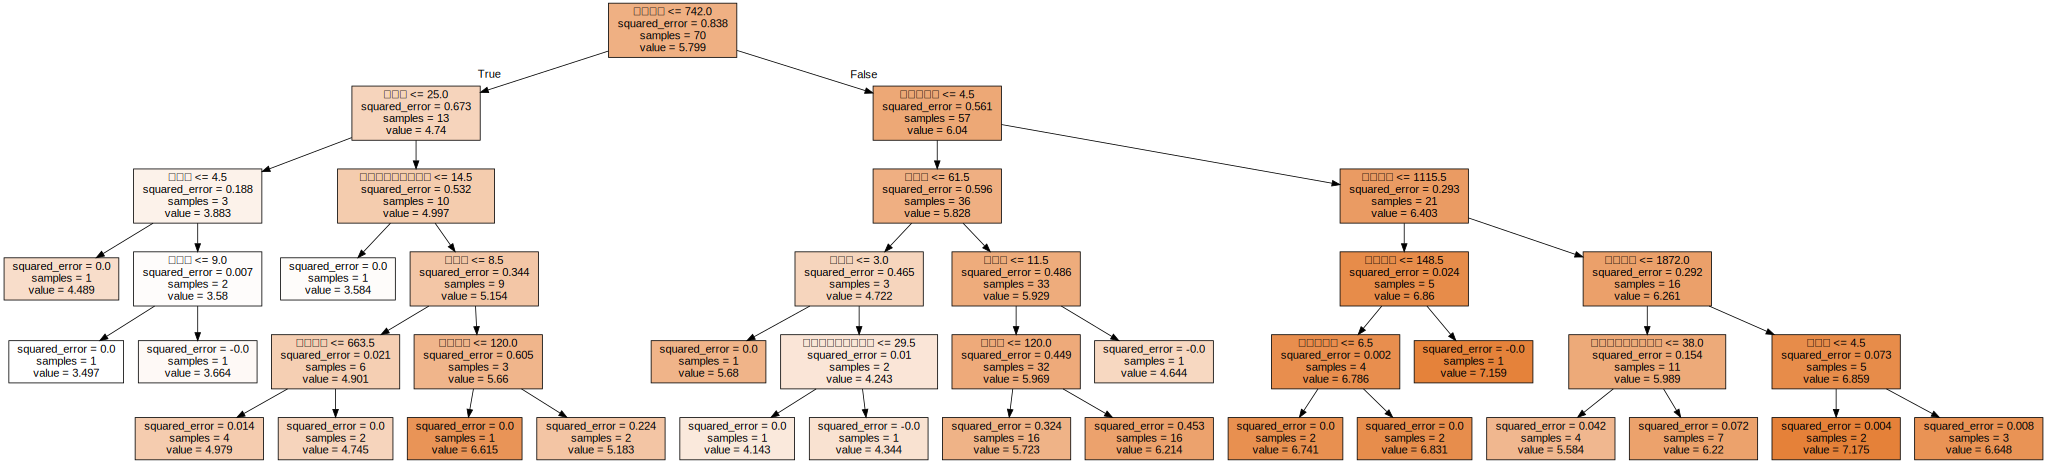

In [ ]:
#시각화
from sklearn.tree import export_graphviz
import graphviz

#파일 생성
export_graphviz(DT_model_reg,out_file = "tree.dot",class_names=["비이탈","이탈"],
                feature_names = feature_name, impurity=True, filled=True)

#파일 열기
with open("tree.dot",encoding="utf-8") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#서포트 벡터 회귀

In [ ]:
X = df[['스크린수','주연배우수','제작비','연령가','원작여부','개봉월','대표배우필모그래피','개봉월','러닝타임']]
Y = df['매출액']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

scaler = StandardScaler().fit(X_train,Y_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

from sklearn.svm import SVR

SVR_model = SVR(C=1, kernel = "linear", epsilon= 0.1)
SVR_model.fit(X_train, Y_train)
Y_pred = SVR_model.predict(X_test)
print("accuracy : {:.3f}".format(SVR_model.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE : {:.3f} ".format(rmse))
print(SVR_model.coef_)

accuracy : 0.272
RMSE : 0.808 
[[ 0.37650385 -0.00483596  0.16617969  0.06583186  0.00672635  0.07388317
   0.11631947  0.07388317  0.09661475]]


#베이지안 릿지

In [ ]:
X = df[['스크린수','주연배우수','제작비','연령가','원작여부','개봉월','대표배우필모그래피','러닝타임']]
Y = np.log1p(df['매출액'])


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

from sklearn.linear_model import BayesianRidge

NB_model_reg = BayesianRidge(alpha_1 = 0.001, lambda_1 = 0.001 )
NB_model_reg.fit(X_train,Y_train)
Y_pred = NB_model_reg.predict(X_test)
print("accuracy : {:.3f}".format(NB_model_reg.score(X_train,Y_train)))
rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print("rmse:{:.3f}".format(rmse))
print(NB_model_reg.coef_)

accuracy : 0.284
rmse:0.125
[ 1.22164616e-04  2.12688489e-04  1.30783351e-05 -5.16067828e-06
 -1.59150844e-05  1.46600839e-04  7.75799074e-04  5.83183740e-04]


#비교

In [ ]:
X1 = df[['스크린수','주연배우수','제작비','연령가','원작여부','개봉월','대표배우필모그래피','러닝타임']]
Y1 = df["매출액"]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y1,test_size=0.3,random_state=0)

#Column transform
ct = ColumnTransformer([("scaling",StandardScaler(),['스크린수','주연배우수','제작비','대표배우필모그래피','러닝타임']),
                        ("onehot",OneHotEncoder(sparse=False),['연령가','원작여부','개봉월'])])

ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=17)
dt_model = DecisionTreeRegressor(random_state=0,max_depth=3)

In [ ]:
knn_model.fit(X_train,Y_train)
dt_model.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [ ]:
knn_Y_pred = knn_model.predict(X_test)
dt_Y_pred = dt_model.predict(X_test)

In [ ]:
print("knn score : {:.3f}".format(knn_model.score(X_train,Y_train)))
print("dt score : {:.3f}".format(dt_model.score(X_train,Y_train)))

knn score : 0.216
dt score : 0.572


#잉공싱경망

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [ ]:

from sklearn.neural_network import MLPRegressor

nn_reg_model = MLPRegressor(random_state = 0, alpha = 0.001, max_iter = 2000, 
                            hidden_layer_sizes = [50, 50])

nn_reg_model.fit(X_train, Y_train)
Y_pred = nn_reg_model.predict(X_test)

print("Y predict value : \n", Y_pred)
print("train accuracy : {:.3f}".format(nn_reg_model.score(X_train, Y_train)))
from sklearn.metrics import mean_squared_error
from math import sqrt 
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE : {:.3f}".format(rmse))

Y predict value : 
 [6.38419158 5.27314749 6.19797667 6.48539446 5.79927661 5.43621744
 6.53523954 7.20758279 7.08411176 6.30407708 6.30935231 5.95374183
 5.70649051 7.99839951 5.8839328  3.88349481 5.86031906 4.91908075
 5.11255205 5.3560308  5.00035064 5.37171197 6.56548405 5.41544417
 5.62772918 5.8696489  9.20210404 5.06370023 6.31817463 7.95751508]
train accuracy : 0.946
RMSE : 1.120


In [ ]:
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.metrics import Accuracy
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

np.random.seed(0)
tf.random.set_seed(0)

model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_dim=8, activation = "relu"))
model.add(keras.layers.Dense(64, activation = "relu"))
model.add(keras.layers.Dense(64, activation = "relu"))

model.compile(loss = "mse", optimizer = "SGD")
Y_pred = np.round(model.predict(X_test[:5], verbose=0), 3)
print("Y predict value \n", Y_pred)
train_score = model.evaluate(X_train, Y_train, verbose=0)
test_score = model.evaluate(X_test, Y_test, verbose=0)
print("train mse : {:.3f}".format(train_score))
print("test mse : {:.3f}".format(test_score))

Y predict value 
 [[0.    0.118 0.021 0.    0.    0.001 0.148 0.    0.294 0.    0.132 0.112
  0.    0.041 0.207 0.    0.26  0.003 0.    0.    0.    0.228 0.404 0.176
  0.05  0.049 0.    0.    0.    0.    0.127 0.    0.    0.175 0.    0.203
  0.    0.    0.    0.244 0.344 0.    0.06  0.    0.    0.    0.    0.
  0.132 0.229 0.    0.081 0.    0.183 0.    0.    0.    0.251 0.    0.038
  0.069 0.    0.381 0.111]
 [0.    0.08  0.    0.046 0.069 0.246 0.13  0.    0.108 0.    0.    0.044
  0.    0.    0.012 0.    0.    0.163 0.185 0.    0.098 0.017 0.371 0.05
  0.048 0.    0.    0.    0.    0.    0.011 0.023 0.137 0.129 0.    0.018
  0.009 0.    0.    0.113 0.    0.    0.    0.    0.    0.    0.105 0.
  0.117 0.164 0.    0.048 0.032 0.    0.171 0.088 0.    0.096 0.008 0.124
  0.    0.    0.127 0.   ]
 [0.    0.016 0.    0.075 0.016 0.285 0.    0.    0.027 0.    0.217 0.033
  0.    0.022 0.125 0.    0.089 0.051 0.    0.    0.033 0.    0.399 0.335
  0.    0.    0.    0.    0.    0.    0.29  0. 

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

svr = SVR()
mlp = MLPRegressor(random_state=0)

model = VotingRegressor(estimators = [("SVR", svr), ("MLP", mlp)])

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)
print("voting regressor accuracy(R2) : {0:.3f}".format(model.score(X_test, Y_test)))
Regressors = [svr, mlp]
for Regressor in Regressors :
    Regressor.fit(X_train, Y_train)
    class_name = Regressor.__class__.__name__
    print("{0} accuracy : {1:.3f}".format(class_name, Regressor.score(X_test,Y_test)))

Y predict value: 
 [1.98701088 1.66306922 2.02259573 1.99290958 1.85133529 1.85316296
 1.99010348 2.09985756 2.0827671  1.89753368 1.91934899 1.89088687
 1.77402089 2.10505213 1.73565458 1.77763351 1.9718546  1.69212838
 1.70422022 1.83672182 1.91482307 1.74379877 1.97057985 1.86985345
 1.7829905  1.90143408 2.25048419 1.80883524 1.83011311 2.06451898]
voting regressor accuracy(R2) : -0.396
SVR accuracy : -0.143
MLPRegressor accuracy : -2.625


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 0, n_estimators = 100, max_depth = 4)

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value : \n", Y_pred)
print("accracy(R2) : {:.3f}".format(model.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE :", rmse)

Y predict value : 
 [1.934971   1.99892962 1.98879477 1.96020719 1.89626272 1.82864123
 1.99965991 1.92831908 2.00314404 1.9667222  1.95381703 1.96222351
 1.9874923  1.97419967 1.92455489 1.81696893 2.03773435 2.03416952
 1.93733911 1.85183533 1.94766661 1.88617518 1.9300785  1.91722671
 1.94239329 1.93905465 1.95994016 1.9513231  1.98281368 1.95910052]
accracy(R2) : 0.742
RMSE : 0.1312132903920169


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state = 0, n_estimators = 100, max_depth = 4, 
                                   learning_rate = 0.1)

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value : \n", Y_pred)
print("accracy(R2) : {:.3f}".format(model.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE :", rmse)

Y predict value : 
 [1.97752614 2.01149131 2.00107836 1.87372153 1.93229339 1.82339057
 2.02546197 1.98891892 2.01731901 2.03824039 1.9136279  1.93645009
 1.97862683 1.96124626 1.88127248 1.73367019 2.09091618 2.06178195
 2.03843435 1.96956335 1.92021987 1.76892875 1.88493941 1.94175724
 1.90164696 1.99341327 1.98699071 1.94256431 2.01984756 1.87142468]
accracy(R2) : 0.999
RMSE : 0.14118897249808468
